<a href="https://colab.research.google.com/github/BalkeesRekik/DS3001/blob/main/Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup as soup
import requests
import re

# Define headers to mimic a real browser
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}

# Craigslist URL for musical instruments in Charlottesville (change location if needed)
url = 'https://charlottesville.craigslist.org/search/msa#search=1~gallery~0~0'

# Get page data
raw = requests.get(url, headers=header)
bsObj = soup(raw.content, 'html.parser')

# Find all listings
listings = bsObj.find_all(class_="cl-static-search-result")

data = []  # List to store extracted data

for item in listings:
    title = item.find('div', class_='title').get_text().strip()
    price = item.find('div', class_='price')
    link = item.find('a', href=True)['href']

    # Extract price (if available)
    if price:
        price = price.get_text().strip()
    else:
        price = 'N/A'

    # Extract condition (if mentioned in title)
    conditions = ['new', 'used', 'like new', 'excellent', 'good', 'fair', 'salvage']
    condition = 'unknown'
    words = title.lower().split()
    for cond in conditions:
        if cond in words:
            condition = cond
            break

    data.append({'title': title, 'price': price, 'condition': condition, 'link': link})

# Convert to DataFrame
df = pd.DataFrame.from_dict(data)

# Clean price column
df['price'] = df['price'].str.replace('$', '').str.replace(',', '')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

df.to_csv('craigslist_musical_instruments.csv', index=False)  # Save data
print(df.shape)
df.head()


(120, 4)


,title,price,condition,link
0,FREE PIANO,0,unknown,https://charlottesville.craigslist.org/msg/d/n...
1,Epiphone Firebird,475,unknown,https://charlottesville.craigslist.org/msg/d/c...
2,Vintage Kay Leader Archtop Electric Guitar 135...,350,unknown,https://charlottesville.craigslist.org/msg/d/c...
3,Martin D35 Sunburst with Fishman Pickup,2800,unknown,https://charlottesville.craigslist.org/msg/d/c...
4,Yamaha JX40 guitar amp MIJ,280,unknown,https://charlottesville.craigslist.org/msg/d/g...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      120 non-null    object
 1   price      120 non-null    int64 
 2   condition  120 non-null    object
 3   link       120 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.9+ KB
None
             price
count   120.000000
mean    432.208333
std     702.860564
min       0.000000
25%      50.000000
50%     170.000000
75%     537.500000
max    5000.000000


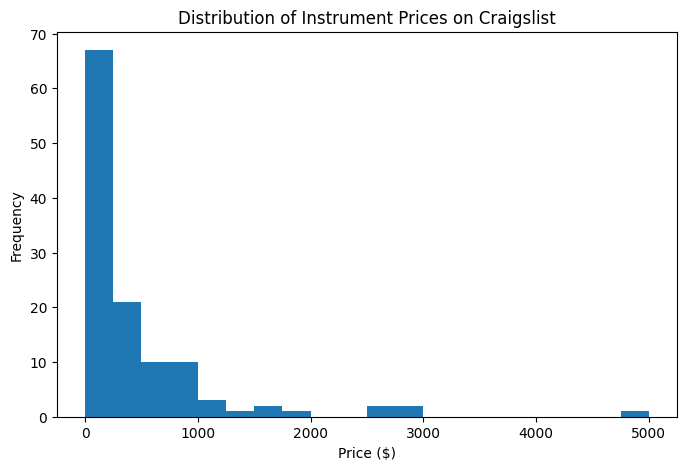

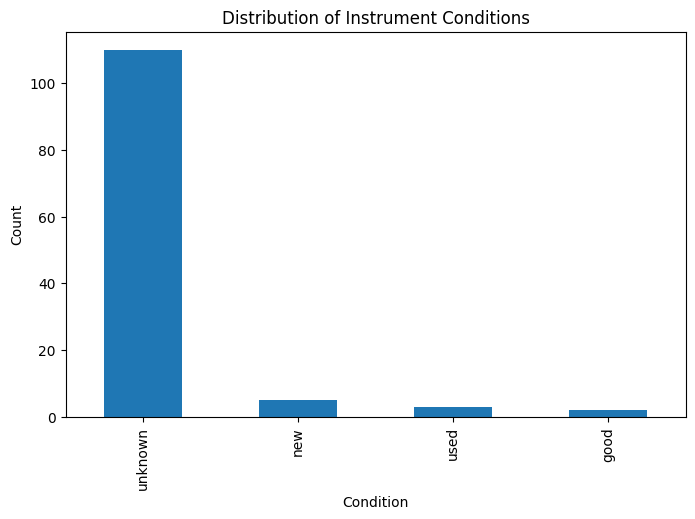

In [4]:
# Check data summary
print(df.info())  # Data types and missing values
print(df.describe())  # Summary statistics for price

# Histogram of prices
plt.figure(figsize=(8, 5))
df['price'].hist(bins=20, grid=False)
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Instrument Prices on Craigslist')
plt.show()

# Count of condition categories
plt.figure(figsize=(8, 5))
df['condition'].value_counts().plot(kind='bar')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Distribution of Instrument Conditions')
plt.show()


instrument_type
other       72
guitar      21
amp          8
drum         6
bass         5
piano        4
banjo        2
mandolin     1
trumpet      1
Name: count, dtype: int64


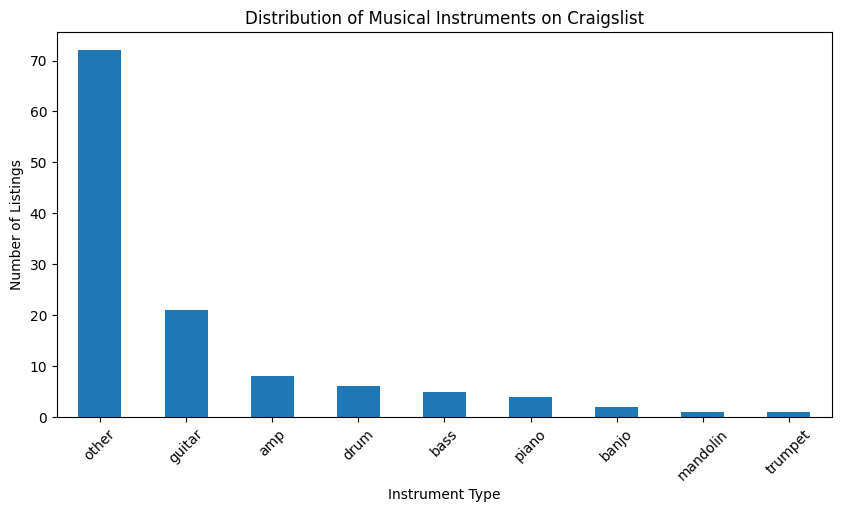

In [5]:
# Define common instrument keywords
instruments = ['guitar', 'piano', 'keyboard', 'violin', 'drum', 'bass', 'trumpet',
               'saxophone', 'trombone', 'flute', 'clarinet', 'cello', 'banjo', 'mandolin', 'amp']

# Function to determine instrument type from title
def get_instrument(title):
    title = title.lower()
    for instrument in instruments:
        if instrument in title:
            return instrument
    return 'other'  # If no match is found

# Apply function to create a new column
df['instrument_type'] = df['title'].apply(get_instrument)

# Count occurrences of each instrument type
instrument_counts = df['instrument_type'].value_counts()

# Display results
print(instrument_counts)

# Visualize the counts
plt.figure(figsize=(10, 5))
instrument_counts.plot(kind='bar')
plt.xlabel('Instrument Type')
plt.ylabel('Number of Listings')
plt.title('Distribution of Musical Instruments on Craigslist')
plt.xticks(rotation=45)
plt.show()
